<a href="https://colab.research.google.com/github/LawalIbraheem19/Machine-Learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, InputLayer, Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [32]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
# Step 1: Convert data to tensor and ensure correct type
tensor_data = tf.constant(data)  # Convert to tensor
tensor_data = tf.cast(tensor_data, tf.float32) #change type to float32

In [34]:
print(f"The shape  of the data is {tensor_data.shape[0]} by {tensor_data.shape[1]}")
print(f"The data type is {tensor_data.dtype}")

The shape  of the data is 1025 by 14
The data type is <dtype: 'float32'>


In [35]:
#Step 2: Randomize the data by shuffling
tensor_data = tf.random.shuffle(tensor_data)

In [36]:
#Step 3: Split the data into X and y
X = tensor_data[:, :-1]
y = tensor_data[:, -1]

print(f"The shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

The shape of X is (1025, 13)
The shape of y is (1025,)


In [37]:
#Step 4: Expand the shape of the target to (N, 1)
y = tf.expand_dims(y, axis=1)
print(f"The shape of y is {y.shape}")

The shape of y is (1025, 1)


In [38]:
#Step 5: Split the data into Training, Testing and Validation
TRAIN_RATIO = 0.7
TEST_RATIO = 0.15
VAL_RATIO = 0.15

train_size = int(TRAIN_RATIO * tensor_data.shape[0])
test_size = int(TEST_RATIO * tensor_data.shape[0])
val_size = int(VAL_RATIO * tensor_data.shape[0])

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+test_size]
y_val = y[train_size:train_size+test_size]

X_test = X[train_size+test_size:]
y_test = y[train_size+test_size:]

In [39]:
#Step 6: Normalization
normalizer = Normalization()
normalizer.adapt(X_train)


In [40]:
#Step 7: Model Building
model = tf.keras.Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Normalization(), # Add normalization layer after input
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dropout(0.2), # Dropout layer
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


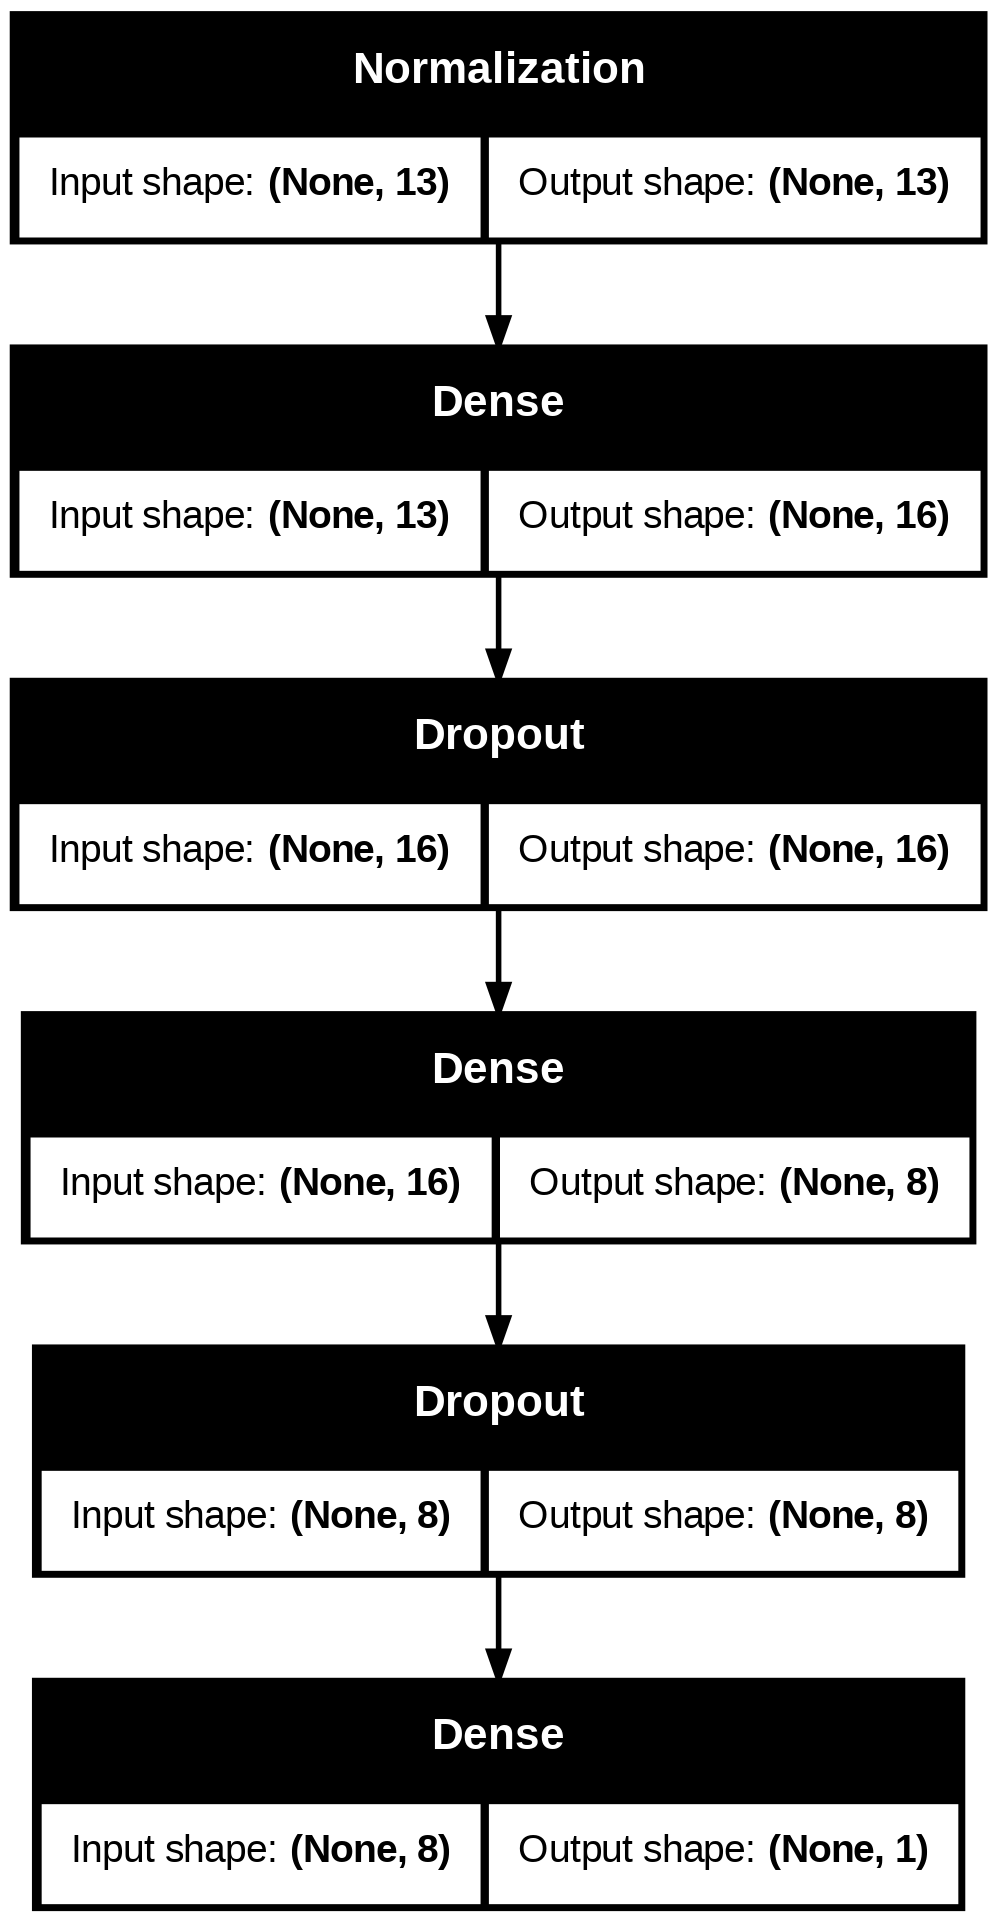

In [41]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [42]:
#Step 8: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=[Accuracy()]
)

In [43]:
#Step 9: Trainning and Optimization
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1075 - loss: 14.4491 - val_accuracy: 0.0000e+00 - val_loss: 2.5630
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1092 - loss: 8.9926 - val_accuracy: 0.0000e+00 - val_loss: 1.9936
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0654 - loss: 7.1795 - val_accuracy: 0.0000e+00 - val_loss: 1.6836
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0400 - loss: 5.6405 - val_accuracy: 0.0000e+00 - val_loss: 1.4689
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0371 - loss: 4.0667 - val_accuracy: 0.0000e+00 - val_loss: 1.2750
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0080 - loss: 2.8993 - val_accuracy: 0.0000e+00 - val_loss: 1.0426
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0139 - loss: 2.2169 - val_accuracy: 0.0000e+00 - val_loss: 0.9138
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0017 - loss: 1.6720 - va

In [44]:
# Step 10: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.7750 
Test Loss: 0.7810749411582947
Test Accuracy: 0.0


In [45]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
